In [270]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score




### 데이터 로드

In [271]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [272]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [273]:
df.duplicated().sum()

np.int64(0)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

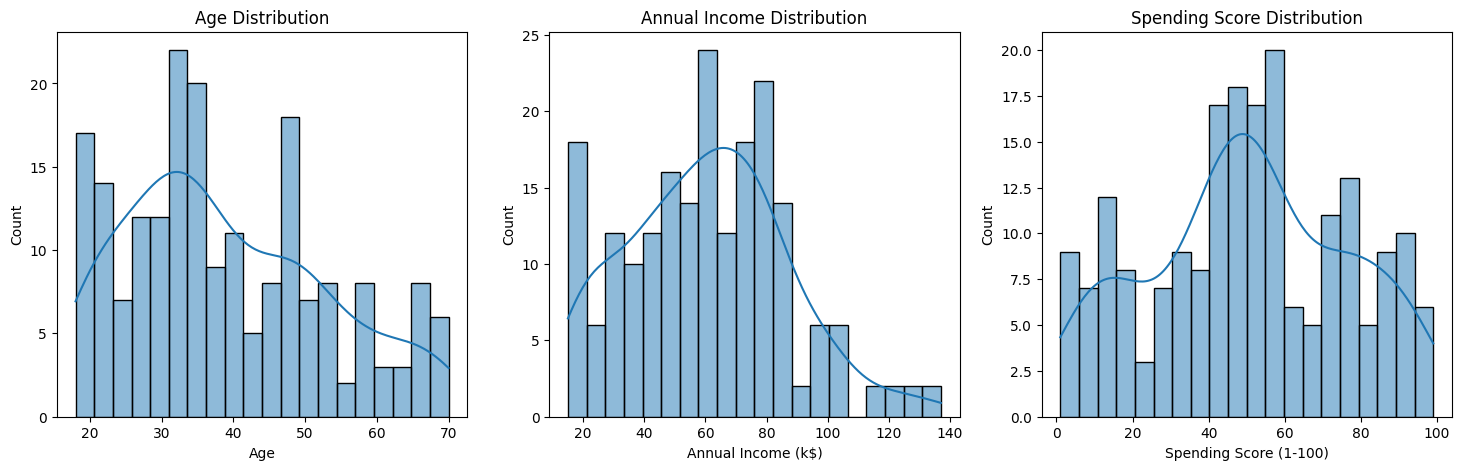

In [275]:
# 히스토그램으로 분포도 확인

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Spending Score Distribution')

plt.show()

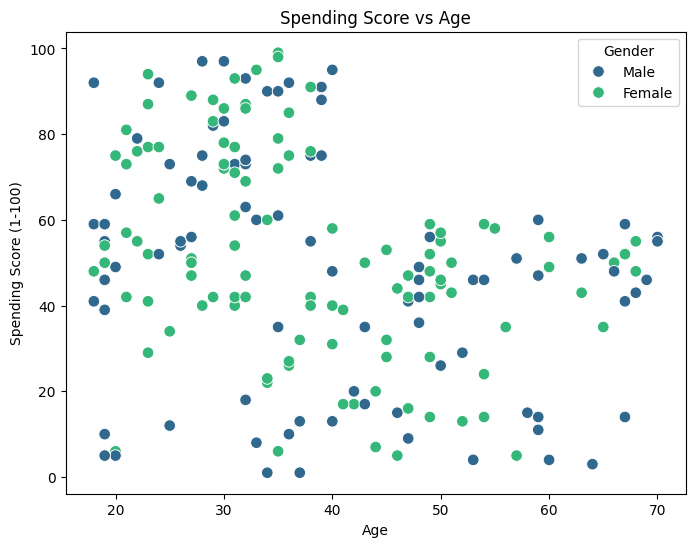

In [276]:
# 나이와 소비점수 간의 관계를 성별에 따라 산점도로 표현

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=70)
plt.title('Spending Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

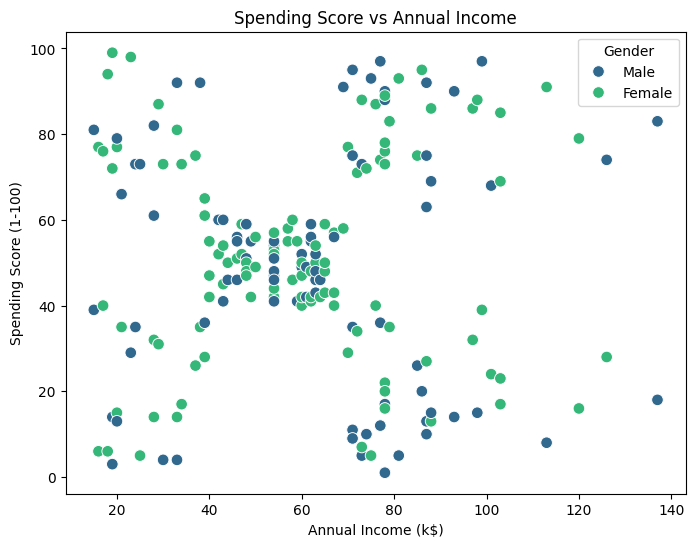

In [277]:
# 연간수입과 소비점수 간의 관계를 성별에 따라 산점도로 표현

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=70)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

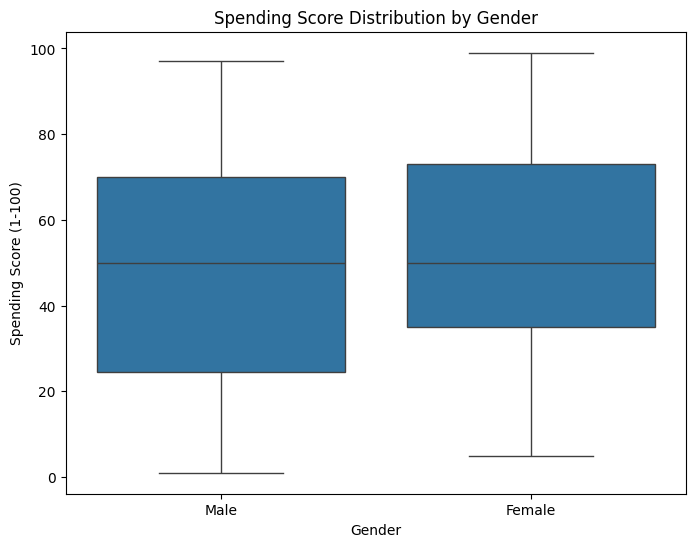

In [278]:
# 성별에 따른 소비점수 분포 -> 박스플롯으로 표현

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Gender')
plt.show()

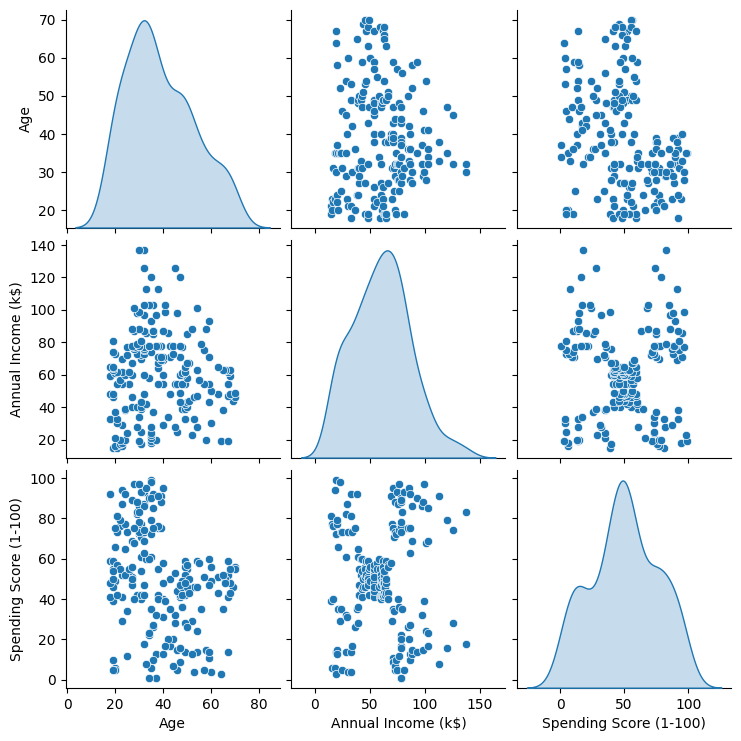

In [279]:
# 나이, 연간수입, 소비점수 간의 관계를 시각화

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

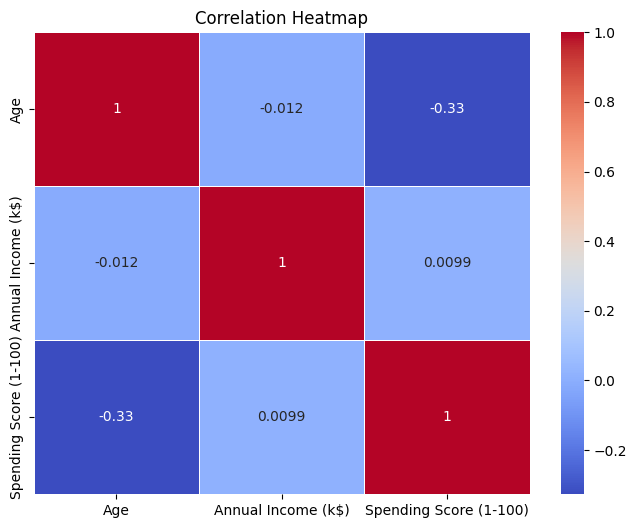

In [280]:
# 나이, 연간수입, 소비점수 간의 상관관계 히트맵

plt.figure(figsize=(8, 6))
correlation = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 데이터 전처리

In [281]:
df = df.drop(columns='CustomerID')   # 쓸모없는 컬럼 삭제

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])   # 범주형 데이터 레이블인코딩

df = df.drop(columns='Gender')    # 지울지 말지 고민

In [282]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### 스케일링

In [283]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [284]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### 엘보포인트로 최적의 클러스터 찾기

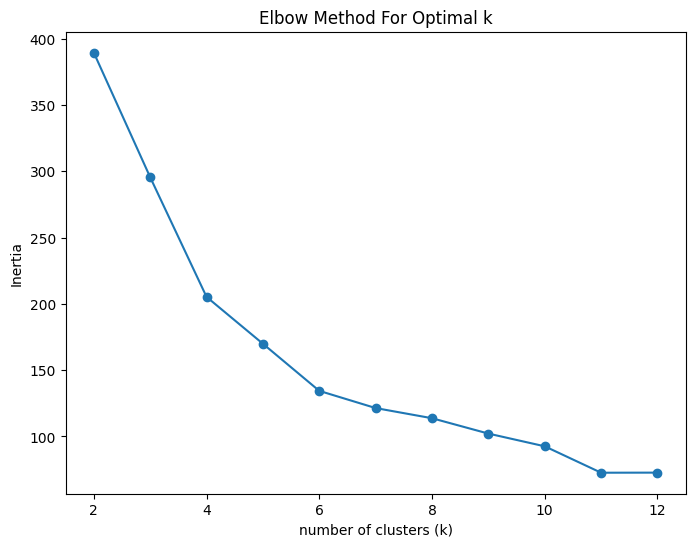

In [285]:
inertia = []
K = range(2, 13)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 내 팔꿈치는 뭔가 이상하냐 -> 왜 중간에 파임?
# 4 or 6 이 최적같아보임

### 실루엣스코어

In [286]:
# silhouette_scores = []
# K = range(2, 13)

# for i in K:
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(df_scaled)
#     score = silhouette_score(df_scaled, kmeans.labels_)
#     silhouette_scores.append(score)
    
# plt.figure(figsize=(8, 6))
# plt.plot(K, silhouette_scores, marker='o')
# plt.title('Silhouette Score for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.show()

### KMeans

In [287]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

### 시각화

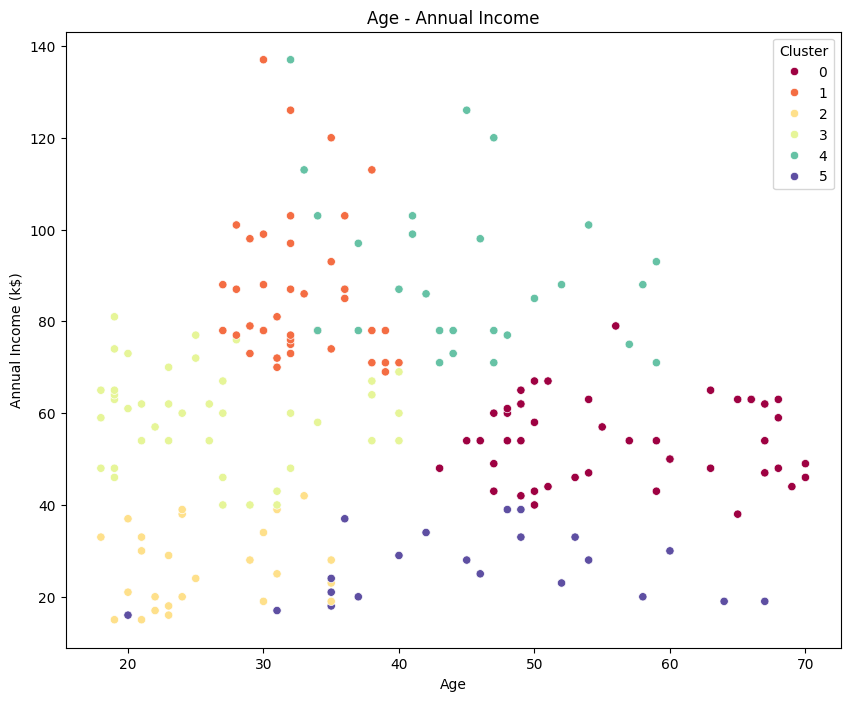

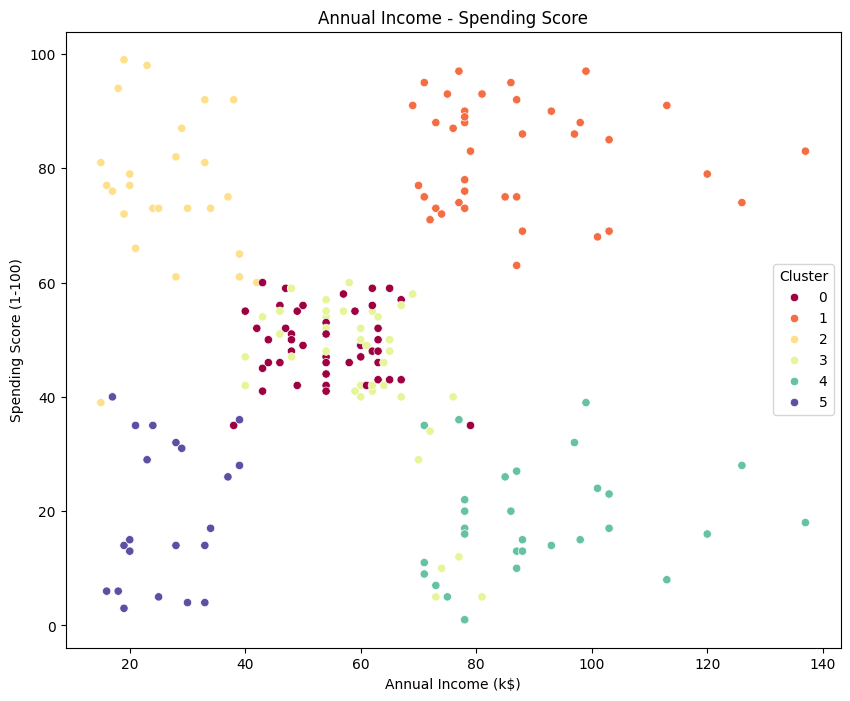

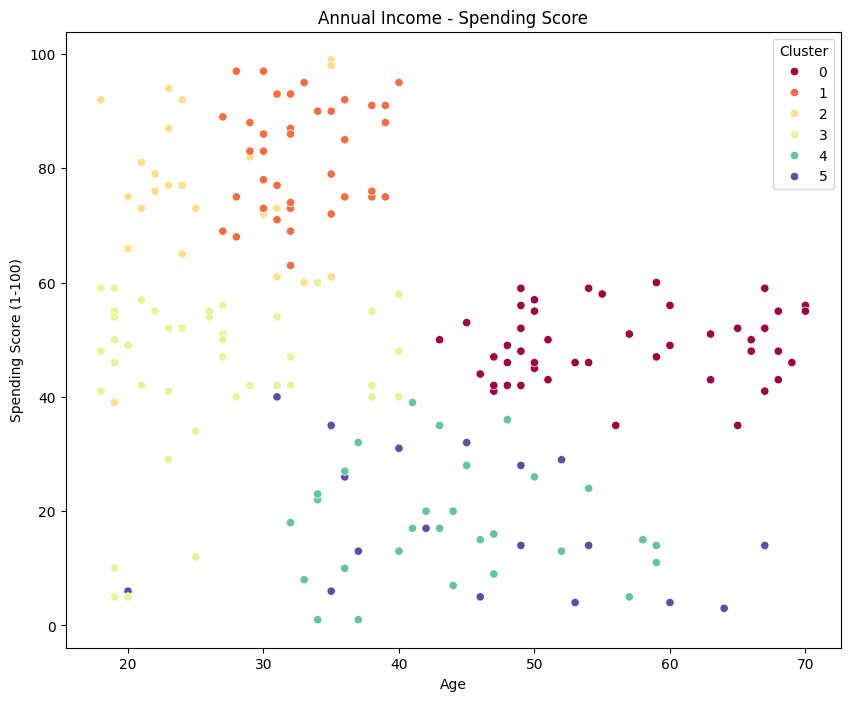

In [288]:
# 2차원으로 군집 시각화 (연령 - 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='Spectral')
plt.title('Age - Annual Income')
plt.show()

# 2차원으로 군집 시각화 (소득 - 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Spectral')
plt.title('Annual Income - Spending Score')
plt.show()

# 2차원으로 군집 시각화 (연령 - 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Spectral')
plt.title('Annual Income - Spending Score')
plt.show()

### 계층적 군집화

In [289]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

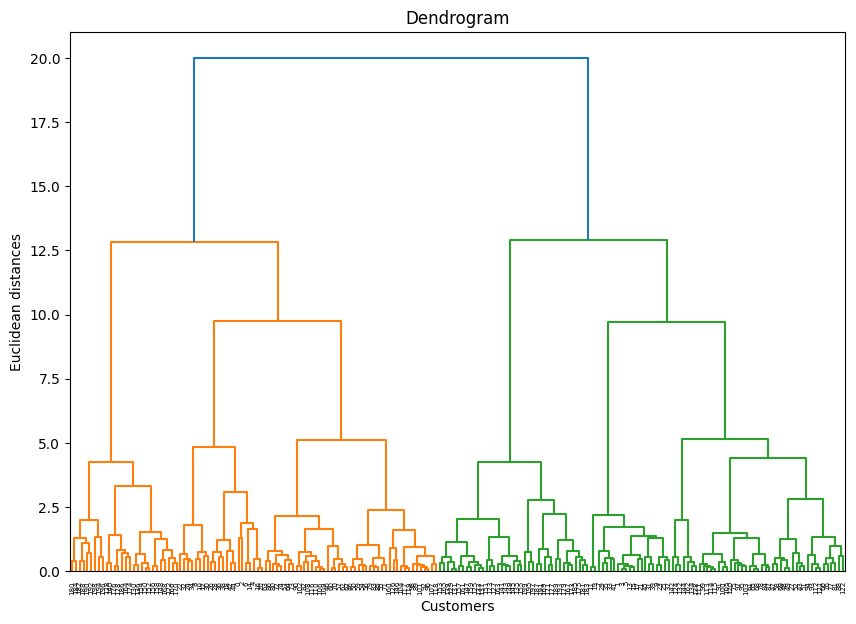

In [290]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

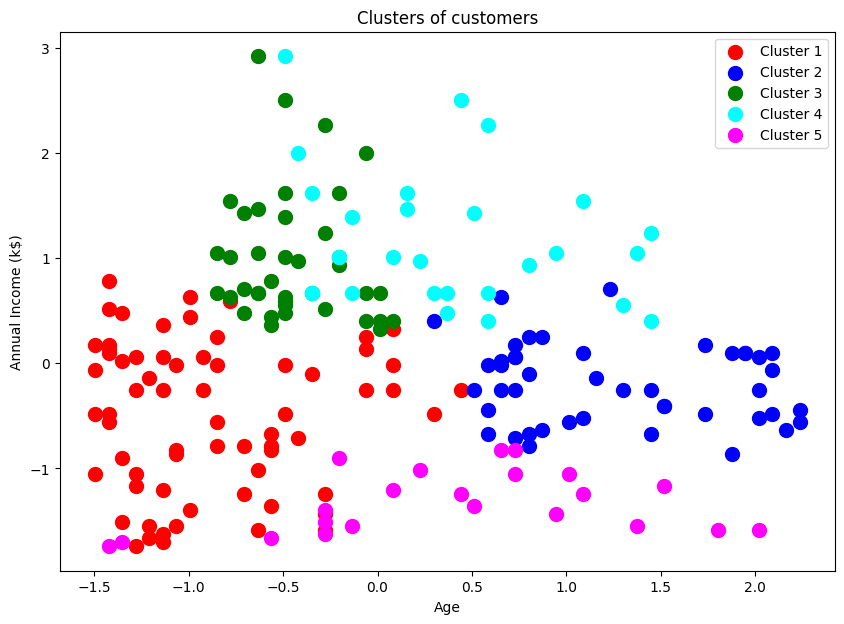

In [291]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(df_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[y_hc == 0, 0], df_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_hc == 1, 0], df_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_hc == 2, 0], df_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_hc == 3, 0], df_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df_scaled[y_hc == 4, 0], df_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [292]:
silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214


### DBSCAN

In [293]:
from sklearn.cluster import DBSCAN
import numpy as np

### 최적의 파라미터 찾기

In [302]:
# 다양한 eps와 min_samples 값 시도
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(3,10)

best_params = {'eps': None, 'min_samples': None}
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette = silhouette_score(df_scaled, labels)
            
            # 최적 점수와 비교하여 업데이트
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

# 최적 값 출력
print(f"Best Silhouette Score: {best_silhouette:.3f}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

Best Silhouette Score: 0.286
Best Parameters: eps=0.6, min_samples=9


### 모델 학습

In [303]:
dbscan = DBSCAN(eps = 0.6, min_samples= 9)
df['Cluster'] = dbscan.fit_predict(df_scaled)

### 시각화

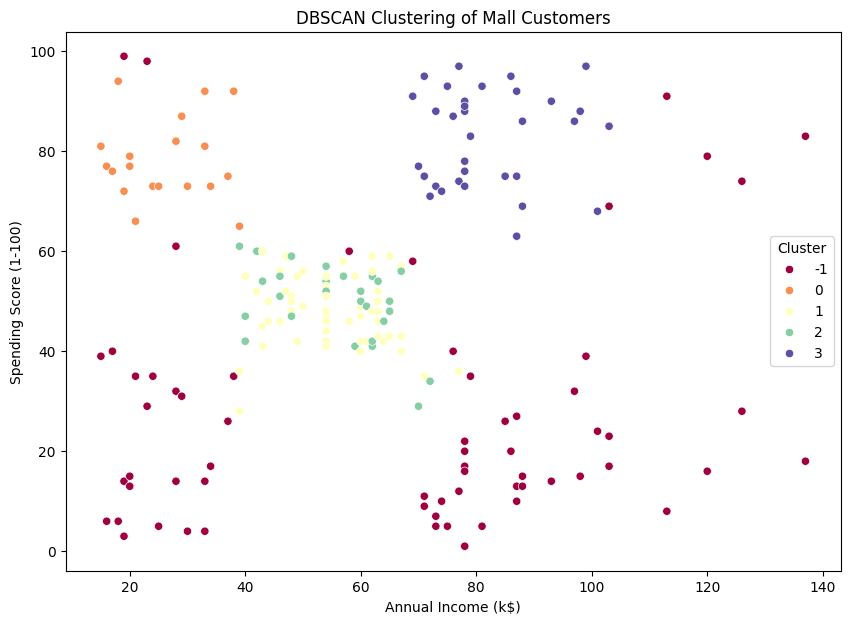

In [307]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Spectral')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

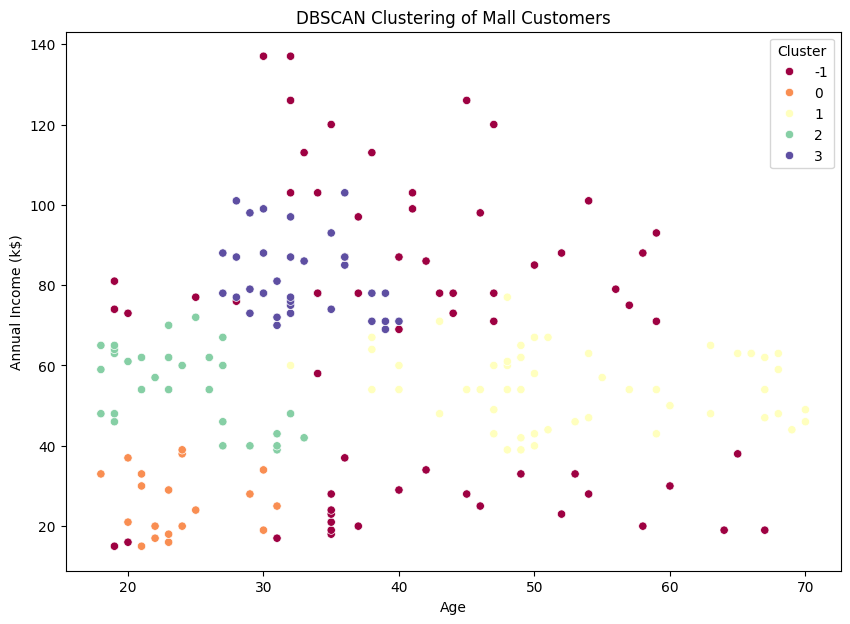

In [306]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Spectral')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()